In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import atlite
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)
import xesmf as xe

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [16]:
filepath="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/europe-2013-sarah3-era5/europe-2013-sarah3-era5.nc"
ds=xr.open_dataset(filepath,decode_times=True, use_cftime=True)
ds

/tmp/ipykernel_65982/1612586324.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds=xr.open_dataset(filepath,decode_times=True, use_cftime=True)


<xarray.Dataset> Size: 13GB
Dimensions:           (x: 177, y: 131, time: 8760)
Coordinates:
  * x                 (x) float64 1kB -12.0 -11.7 -11.4 -11.1 ... 40.2 40.5 40.8
  * y                 (y) float64 1kB 33.0 33.3 33.6 33.9 ... 71.4 71.7 72.0
  * time              (time) object 70kB 2013-01-01 00:00:00 ... 2013-12-31 2...
    lon               (x) float64 1kB ...
    lat               (y) float64 1kB ...
Data variables: (12/13)
    influx_direct     (time, y, x) float32 812MB ...
    influx_diffuse    (time, y, x) float32 812MB ...
    solar_altitude    (time, y, x) float64 2GB ...
    solar_azimuth     (time, y, x) float64 2GB ...
    height            (y, x) float32 93kB ...
    wnd100m           (time, y, x) float32 812MB ...
    ...                ...
    roughness         (time, y, x) float32 812MB ...
    influx_toa        (time, y, x) float32 812MB ...
    albedo            (time, y, x) float32 812MB ...
    temperature       (time, y, x) float64 2GB ...
    soil temperature  (time, y, x) float64 2GB ...
    runoff            (time, y, x) float32 812MB ...
Attributes: (12/46)
    module:                     ['era5', 'sarah']
    prepared_features:          ['height', 'influx', 'runoff', 'temperature',...
    chunksize_lat:              -1
    chunksize_time:             100
    sarah_dir:                  data
    dx:                         0.3
    ...                         ...
    instrument:                 SEVIRI > Spinning Enhanced Visible and Infrar...
    variable_id:                SIS
    license:                    The CM SAF data are owned by EUMETSAT and are...
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...
    history:                    2022-07-09 17:18:34 GMT by grib_to_netcdf-2.2...

In [3]:
filepath2="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/europe-2013.nc"
ds2=xr.open_dataset(filepath2,decode_times=True, use_cftime=True)
ds2

/tmp/ipykernel_61892/1793286140.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds2=xr.open_dataset(filepath2,decode_times=True, use_cftime=True)


<xarray.Dataset> Size: 20GB
Dimensions:               (x: 212, y: 157, time: 8760)
Coordinates:
  * x                     (x) float64 2kB -12.0 -11.75 -11.5 ... 40.5 40.75
  * y                     (y) float64 1kB 33.0 33.25 33.5 ... 71.5 71.75 72.0
  * time                  (time) object 70kB 2013-01-01 00:00:00 ... 2013-12-...
    lon                   (x) float64 2kB ...
    lat                   (y) float64 1kB ...
Data variables: (12/15)
    height                (y, x) float32 133kB ...
    wnd100m               (time, y, x) float32 1GB ...
    wnd_shear_exp         (time, y, x) float64 2GB ...
    wnd_azimuth           (time, y, x) float32 1GB ...
    roughness             (time, y, x) float32 1GB ...
    influx_toa            (time, y, x) float32 1GB ...
    ...                    ...
    solar_altitude        (time, y, x) float64 2GB ...
    solar_azimuth         (time, y, x) float64 2GB ...
    temperature           (time, y, x) float32 1GB ...
    soil temperature      (time, y, x) float32 1GB ...
    dewpoint temperature  (time, y, x) float32 1GB ...
    runoff                (time, y, x) float32 1GB ...
Attributes:
    module:                  era5
    prepared_features:       ['runoff', 'temperature', 'height', 'wind', 'inf...
    chunksize_time:          100
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-07T15:04 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
cutout = atlite.Cutout(
    path="europe-2013",
    module=["era5"],
    x=slice(-12, 40.8),
    y=slice(33, 72),
    time="2013",  # Pass the concatenated DatetimeIndex
    chunks={"time": 100},
)

cutout

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/atlite/cutout.py:156: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


<Cutout "europe-2013">
 x = -12.00 ⟷ 40.75, dx = 0.25
 y = 33.00 ⟷ 72.00, dy = 0.25
 time = 2013-01-01 ⟷ 2013-12-31, dt = h
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [5]:
cutout.prepare()

INFO:atlite.data:Cutout already prepared.


<Cutout "europe-2013">
 x = -12.00 ⟷ 40.75, dx = 0.25
 y = 33.00 ⟷ 72.00, dy = 0.25
 time = 2013-01-01 ⟷ 2013-12-31, dt = h
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [3]:
from regridding_functions import read_and_average_era5_marta
from regridding_functions import read_and_average_sarah
rsds_era5_mean= read_and_average_era5_marta('influx_direct')
rsds_sarah_mean= read_and_average_sarah('influx_direct')

['/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-2010-era5.nc', '/groups/EXTREMES/cutouts/europe-2012-era5.nc', '/groups/EXTREMES/cutouts/europe-2013-era5.nc']
['/groups/EXTREMES/SARAH-3/europe-1996-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2010-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2012-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2013-sarah3-era5.nc']


In [4]:
rsds_era5_mean
rsds_era5_mean.values

array([[150.93199 , 151.98932 , 152.90614 , ..., 166.22064 , 164.14455 ,
        162.44788 ],
       [149.48578 , 150.55933 , 151.48317 , ..., 165.32552 , 163.41414 ,
        162.12865 ],
       [148.68848 , 149.86131 , 150.8037  , ..., 165.20326 , 163.24002 ,
        161.9256  ],
       ...,
       [ 29.77299 ,  29.432863,  29.17141 , ...,  36.953964,  36.909832,
         36.85728 ],
       [ 30.149855,  29.784796,  29.475006, ...,  35.62425 ,  35.615944,
         35.606182],
       [ 30.490927,  30.12163 ,  29.816015, ...,  34.166336,  34.168774,
         34.158714]], dtype=float32)

In [34]:
rsds_era5_mean_cut=rsds_era5_mean.sel(x=slice(-12, 35), y=slice(33, 72))
rsds_sarah_mean_cut=rsds_sarah_mean.sel(x=slice(-12, 35), y=slice(33, 72))

In [35]:
from regridding_functions import regrid
regridder=regrid(rsds_era5_mean_cut, rsds_sarah_mean_cut, method='conservative')

189 190
157 158
157 158
131 132


In [36]:
regridder

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_157x189_131x157.nc 
Reuse pre-computed weights? False 
Input grid shape:           (157, 189) 
Output grid shape:          (131, 157) 
Periodic in longitude?      False

In [38]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
rsds_era5_mean_interp_cut=regridder(rsds_era5_mean)


rsds_era5_mean_interp_cut



/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_direct as the horizontal dimensions for the regridding.
  warnings.warn(


<xarray.DataArray (lat: 131, lon: 157)> Size: 82kB
dask.array<astype, shape=(131, 157), dtype=float32, chunksize=(131, 157), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 1kB 33.0 33.3 33.6 33.9 34.2 ... 71.1 71.4 71.7 72.0
  * lon      (lon) float64 1kB -12.0 -11.7 -11.4 -11.1 ... 33.9 34.2 34.5 34.8
Attributes:
    regrid_method:  conservative

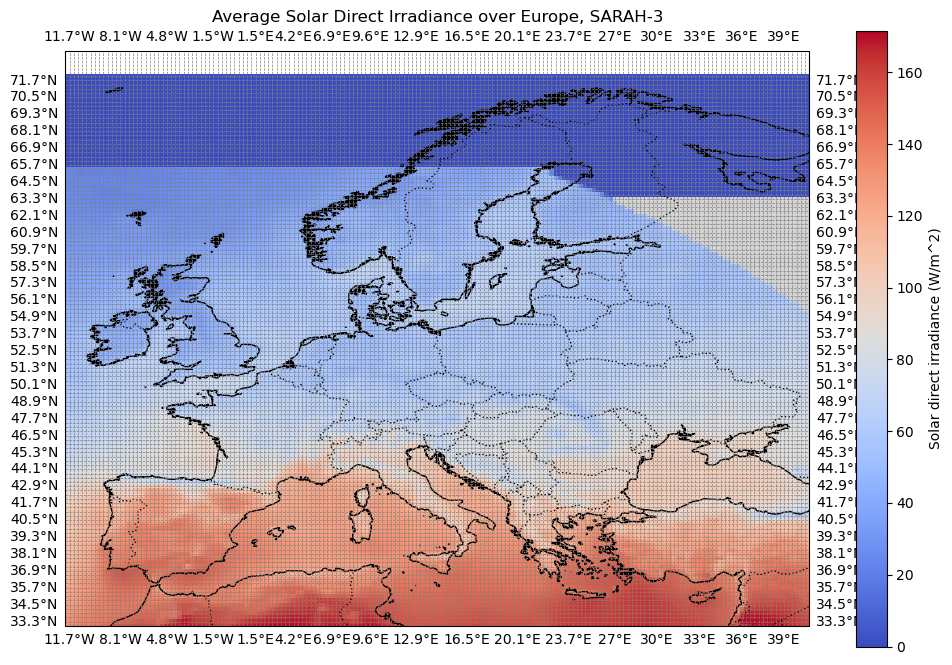

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract the longitude and latitude from the dataset
lon = rsds_sarah_mean.lon
lat = rsds_sarah_mean.lat

# Create the figure and axes with a PlateCarree projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
rsds_sarah_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe using the min and max of the lon and lat from the data
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon, ylocs=lat, x_inline=False, y_inline=False)

# Add title and labels
plt.title(f'Average Solar Direct Irradiance over Europe, SARAH-3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()



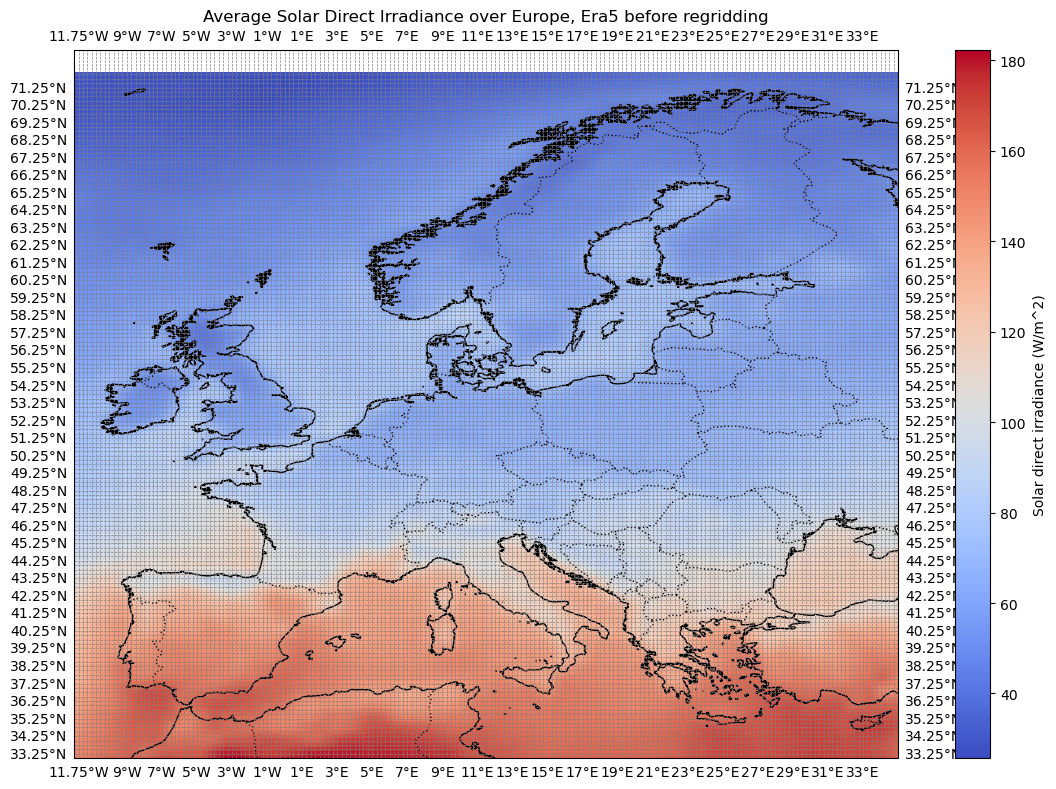

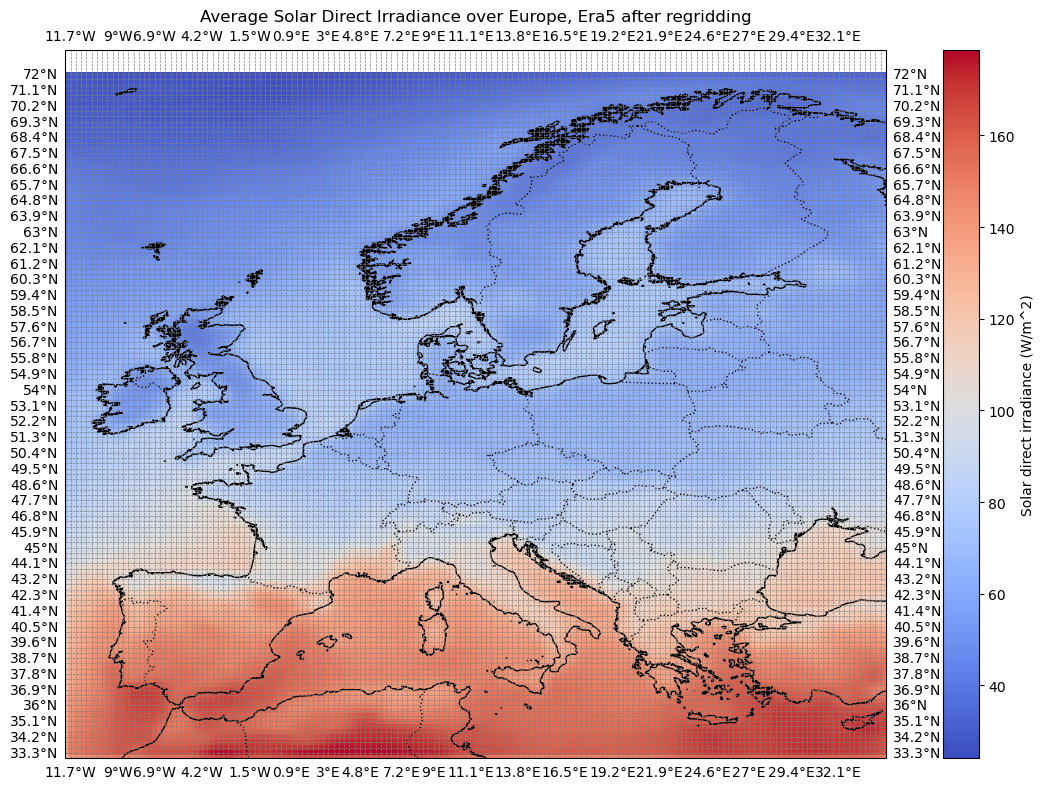

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract the longitude and latitude from the datasets
lon_era5 = rsds_era5_mean.lon
lat_era5 = rsds_era5_mean.lat
lon_era5_interp_cut = rsds_era5_mean_interp_cut.lon
lat_era5_interp_cut = rsds_era5_mean_interp_cut.lat

# Create the figure for rsds_era5_mean (before regridding)
fig1, ax1 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax1.set_title('rsds_era5_mean (Before Regridding)')
rsds_era5_mean_cut.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax1.coastlines(resolution='10m', linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (before regridding)
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5, ylocs=lat_era5, x_inline=False, y_inline=False)

# Set the extent to Europe for the first plot
ax1.set_extent([lon_era5.min(), lon_era5.max(), lat_era5.min(), lat_era5.max()])

# Show the first plot
plt.title(f'Average Solar Direct Irradiance over Europe, Era5 before regridding')
plt.tight_layout()
plt.show()

# Create the figure for rsds_era5_mean_interp (after regridding)
fig2, ax2 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax2.set_title('rsds_era5_mean_interp (After Regridding)')
rsds_era5_mean_interp_cut.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax2.coastlines(resolution='10m', linewidth=1)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (after regridding)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5_interp_cut, ylocs=lat_era5_interp_cut, x_inline=False, y_inline=False)

# Set the extent to Europe for the second plot
ax2.set_extent([lon_era5_interp_cut.min(), lon_era5_interp_cut.max(), lat_era5_interp_cut.min(), lat_era5_interp_cut.max()]) #I choose the smaller coordinate range from Era5

# Show the second plot
plt.title(f'Average Solar Direct Irradiance over Europe, Era5 after regridding')
plt.tight_layout()
plt.show()


In [43]:
# Check the latitude and longitude range and increments for each dataset
def check_lat_lon_range_and_increment(ds, dataset_name):
    # Extract the latitude and longitude
    lat = ds.lat
    lon = ds.lon
    
    # Latitude and longitude range
    lat_range = (lat.min().values, lat.max().values)
    lon_range = (lon.min().values, lon.max().values)
    
    # Latitude and longitude increment (difference between consecutive values)
    lat_increment = np.abs(lat[1] - lat[0]).values
    lon_increment = np.abs(lon[1] - lon[0]).values
    
    print(f"Dataset: {dataset_name}")
    print(f"Latitude range: {lat_range}")
    print(f"Longitude range: {lon_range}")
    print(f"Latitude increment: {lat_increment} degrees")
    print(f"Longitude increment: {lon_increment} degrees")
    print("-" * 50)

# Check for rsds_era5_mean
check_lat_lon_range_and_increment(rsds_era5_mean, "rsds_era5_mean")

# Check for rsds_era5_mean_interp
check_lat_lon_range_and_increment(rsds_era5_mean_interp_cut, "rsds_era5_mean_interp")

# Check for rsds_sarah_mean
check_lat_lon_range_and_increment(rsds_sarah_mean_cut, "rsds_sarah_mean_cut")


Dataset: rsds_era5_mean
Latitude range: (array(33.), array(72.))
Longitude range: (array(-12.), array(35.))
Latitude increment: 0.25 degrees
Longitude increment: 0.25 degrees
--------------------------------------------------
Dataset: rsds_era5_mean_interp
Latitude range: (array(33.), array(72.))
Longitude range: (array(-12.), array(34.8))
Latitude increment: 0.29999999999999716 degrees
Longitude increment: 0.3000000000000007 degrees
--------------------------------------------------
Dataset: rsds_sarah_mean_cut
Latitude range: (array(33.), array(72.))
Longitude range: (array(-12.), array(34.8))
Latitude increment: 0.29999999999999716 degrees
Longitude increment: 0.3000000000000007 degrees
--------------------------------------------------


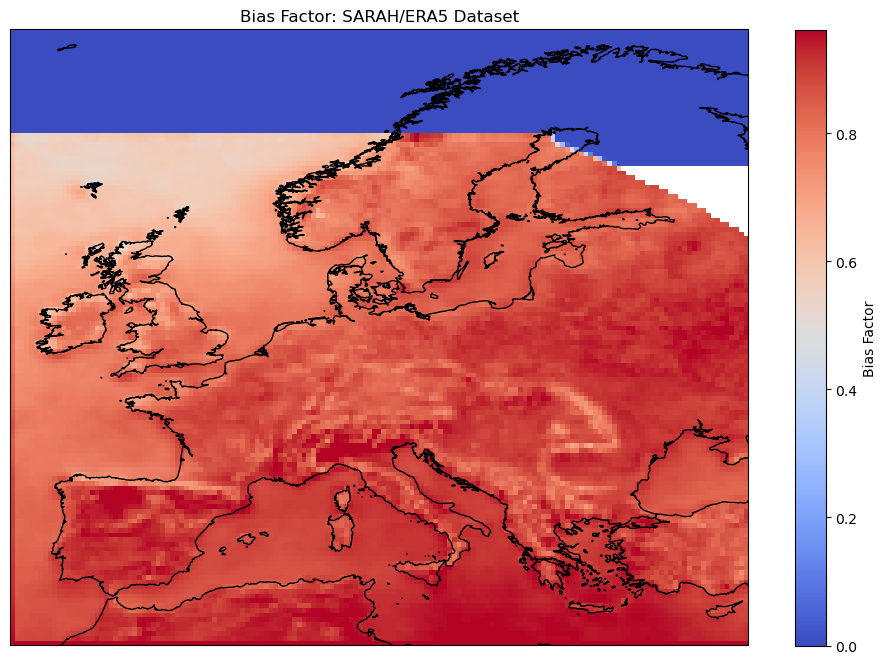

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming these variables exist
denominator= rsds_era5_mean_interp_cut.values  # ERA5 dataset
numerator= rsds_sarah_mean_cut.values  # SARAH dataset

# Ensure valid bias factor calculation
mask_valid = (denominator != 0)  # Avoid division by zero and all values in sarah that have mean 0
biased_values = np.where(mask_valid, numerator / denominator, np.nan)  # Replace invalid cases with NaN

# Ensure correct shape
biased_values = np.squeeze(biased_values)

# Get lat/lon values
lon = rsds_sarah_mean_cut.lon.values
lat = rsds_sarah_mean_cut.lat.values

# Ensure lon/lat are 2D using meshgrid
lon2d, lat2d = np.meshgrid(lon, lat)

# Use percentiles to remove outliers
vmin = np.nanpercentile(biased_values, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(biased_values, 98)  # 98th percentile (upper bound)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, biased_values,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=vmin, vmax=vmax  # Clip extreme outliers
)
# Set the latitude and longitude limits (set max latitude to 65)
#ax.set_extent([lon.min(), lon.max(), lat.min(), 65], crs=ccrs.PlateCarree())

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.set_title("Bias Factor: SARAH/ERA5 Dataset")

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show()



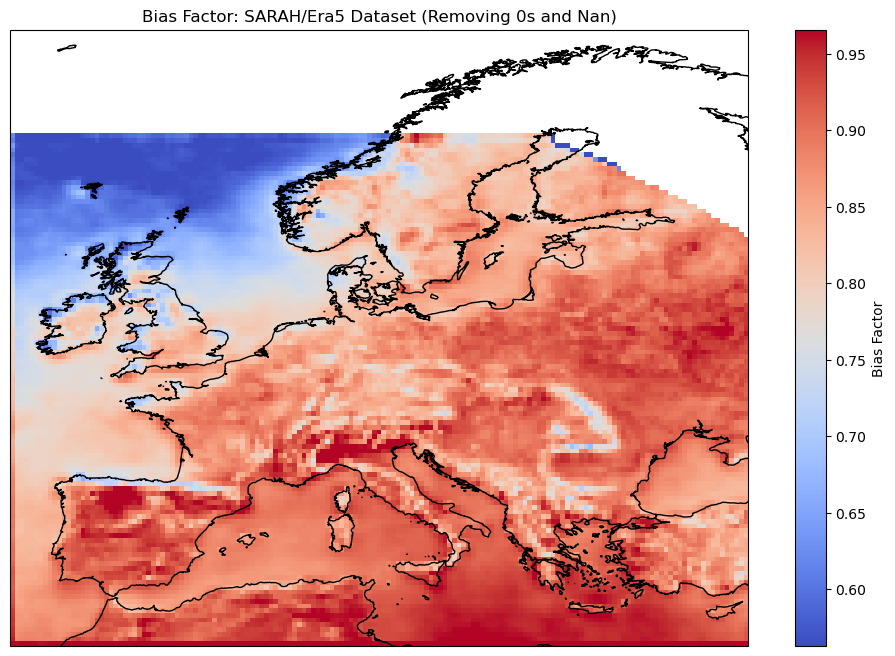

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming these variables exist
denominator = rsds_era5_mean_interp_cut.values  # ERA5 dataset
numerator = rsds_sarah_mean_cut.values  # SARAH dataset

# Ensure valid bias factor calculation
mask_valid = (denominator != 0) & (numerator != 0)  # Avoid division by zero and all values in SARAH that have mean 0
biased_values = np.where(mask_valid, numerator / denominator, np.nan)  # Replace invalid cases with NaN

# Ensure correct shape (remove extra dimension if it exists)
biased_values = np.squeeze(biased_values)  # Remove extra dimensions (e.g., (2, 131, 177) to (131, 177))

# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = rsds_era5_mean_interp_cut.lon.values #I choose the smaller coordinate range from Era5
lat = rsds_era5_mean_interp_cut.lat.values

# Ensure lon/lat are 2D using meshgrid
lon2d, lat2d = np.meshgrid(lon, lat)

# Use percentiles to remove outliers
vmin = np.nanpercentile(biased_values, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(biased_values, 98)  # 98th percentile (upper bound)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, biased_values,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=vmin, vmax=vmax  # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.set_title("Bias Factor: SARAH/Era5 Dataset (Removing 0s and Nan)")

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show()


In [47]:
mean_bias_factor_era5_sarah = np.nanmean(biased_values)
print(f"Mean Bias Factor: {mean_bias_factor_era5_sarah:.3f}")

Mean Bias Factor: 0.839


In [48]:
# Calculate the 2nd and 98th percentiles to exclude outliers
lower_percentile = np.nanpercentile(biased_values, 2)  # 2nd percentile
upper_percentile = np.nanpercentile(biased_values, 98)  # 98th percentile

# Print the percentiles to check their range
print(f"2nd Percentile: {lower_percentile}")
print(f"98th Percentile: {upper_percentile}")

# Mask the biased_values to keep only those within the 2nd and 98th percentiles
filtered_biased_values = biased_values[(biased_values >= lower_percentile) & (biased_values <= upper_percentile)]

# Calculate the mean of the filtered values
mean_bias_factor_era5_sarah = np.nanmean(filtered_biased_values)

print(f"Mean Bias Factor (excluding outliers): {mean_bias_factor_era5_sarah:.3f}")



2nd Percentile: 0.5630109906196594
98th Percentile: 0.9656639099121094
Mean Bias Factor (excluding outliers): 0.842


In [49]:
rsds_era5_mean_interp_cut

<xarray.DataArray (lat: 131, lon: 157)> Size: 82kB
dask.array<astype, shape=(131, 157), dtype=float32, chunksize=(131, 157), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 1kB 33.0 33.3 33.6 33.9 34.2 ... 71.1 71.4 71.7 72.0
  * lon      (lon) float64 1kB -12.0 -11.7 -11.4 -11.1 ... 33.9 34.2 34.5 34.8
Attributes:
    regrid_method:  conservative

In [50]:
rsds_era5_mean_interp_cut.sel(lon=slice(-12,35))
corrected_rsds_era5= rsds_era5_mean_interp_cut.values * biased_values
corrected_rsds_era5
# Count the number of NaNs in the corrected_rsds_era5 array
nan_count = np.sum(np.isnan(corrected_rsds_era5))

print(f"Number of NaN values in corrected_rsds_era5: {nan_count}")
corrected_rsds_era5


Number of NaN values in corrected_rsds_era5: 3905


array([[132.80338, 134.33977, 135.89847, ..., 154.18634, 152.43385,
        151.05031],
       [130.79848, 132.31645, 133.9084 , ..., 152.8806 , 151.2229 ,
        149.7697 ],
       [129.60965, 131.05632, 132.80116, ..., 152.45618, 150.91994,
        150.22472],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

In [51]:
import numpy as np
from scipy import interpolate

# Create a mask to identify the NaN values
nan_mask = np.isnan(corrected_rsds_era5)

# Perform interpolation to fill NaN values
# Use the 'nearest' method to fill NaNs with the closest available value

# Interpolation along each column (latitude)
corrected_rsds_era5_filled = np.copy(corrected_rsds_era5)

for i in range(corrected_rsds_era5.shape[1]):  # Iterate over each column (longitude)
    col = corrected_rsds_era5[:, i]
    
    # Check if the column contains any non-NaN values
    non_nan_indices = np.where(~np.isnan(col))[0]
    
    if len(non_nan_indices) > 0:
        # Interpolate the column for NaN values
        col_filled = interpolate.interp1d(
            non_nan_indices,  # Indices of non-NaN values
            col[non_nan_indices],  # Non-NaN values
            kind='nearest',  # Nearest-neighbor interpolation
            fill_value='extrapolate',  # Extrapolate if needed (you can set to 'NaN' instead)
            bounds_error=False  # Avoid errors if no non-NaN values are found
        )
        corrected_rsds_era5_filled[:, i] = col_filled(np.arange(corrected_rsds_era5.shape[0]))
    else:
        print(f"Column {i} contains only NaN values. Skipping interpolation.")

# After filling NaNs, check again for NaNs
nan_count_filled = np.sum(np.isnan(corrected_rsds_era5_filled))

print(f"Number of NaN values after filling: {nan_count_filled}")




Number of NaN values after filling: 0


In [52]:
corrected_rsds_era5_filled

array([[132.80338 , 134.33977 , 135.89847 , ..., 154.18634 , 152.43385 ,
        151.05031 ],
       [130.79848 , 132.31645 , 133.9084  , ..., 152.8806  , 151.2229  ,
        149.7697  ],
       [129.60965 , 131.05632 , 132.80116 , ..., 152.45618 , 150.91994 ,
        150.22472 ],
       ...,
       [ 25.605408,  24.48153 ,  23.639103, ...,  51.73658 ,  52.232124,
         52.639717],
       [ 25.605408,  24.48153 ,  23.639103, ...,  51.73658 ,  52.232124,
         52.639717],
       [ 25.605408,  24.48153 ,  23.639103, ...,  51.73658 ,  52.232124,
         52.639717]], dtype=float32)

In [53]:
#alternative to avoid nans
corrected_rsds_era5_mean_bias= rsds_era5_mean_interp_cut.values * mean_bias_factor_era5_sarah
corrected_rsds_era5_mean_bias

array([[106.74987 , 117.37154 , 118.20449 , ..., 129.66931 , 128.19203 ,
        126.30401 ],
       [115.29459 , 126.81204 , 127.73024 , ..., 140.80937 , 139.15378 ,
        137.27777 ],
       [114.702774, 126.23828 , 127.1968  , ..., 140.91672 , 139.2312  ,
        137.27402 ],
       ...,
       [ 22.845987,  24.617186,  24.37331 , ...,  31.621727,  31.555496,
         31.496538],
       [ 23.170961,  24.940147,  24.656181, ...,  30.314785,  30.275768,
         30.256433],
       [ 21.538868,  23.179222,  22.902102, ...,  26.497635,  26.488338,
         26.487896]], dtype=float32)

In [54]:
#Now we do the same for rsdsdiff
from regridding_functions import read_and_average_era5_marta
from regridding_functions import read_and_average_sarah
rsdsdiff_era5_mean= read_and_average_era5_marta('influx_diffuse')
rsdsdiff_sarah_mean= read_and_average_sarah('influx_diffuse')

['/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-2010-era5.nc', '/groups/EXTREMES/cutouts/europe-2012-era5.nc', '/groups/EXTREMES/cutouts/europe-2013-era5.nc']
['/groups/EXTREMES/SARAH-3/europe-1996-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2010-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2012-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2013-sarah3-era5.nc']


In [55]:
rsdsdiff_era5_mean_cut=rsdsdiff_era5_mean.sel(x=slice(-12, 35), y=slice(33, 72))
rsdsdiff_sarah_mean_cut=rsdsdiff_sarah_mean.sel(x=slice(-12, 35), y=slice(33, 72))

In [56]:
from regridding_functions import regrid
regridder_rsdsdiff=regrid(rsdsdiff_era5_mean_cut, rsdsdiff_sarah_mean_cut, method='conservative')

189 190
157 158
157 158
131 132


In [57]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
rsdsdiff_era5_mean_interp_cut=regridder_rsdsdiff(rsdsdiff_era5_mean_cut)

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_diffuse as the horizontal dimensions for the regridding.
  warnings.warn(


NotImplementedError: 'item' is not yet a valid method on dask arrays

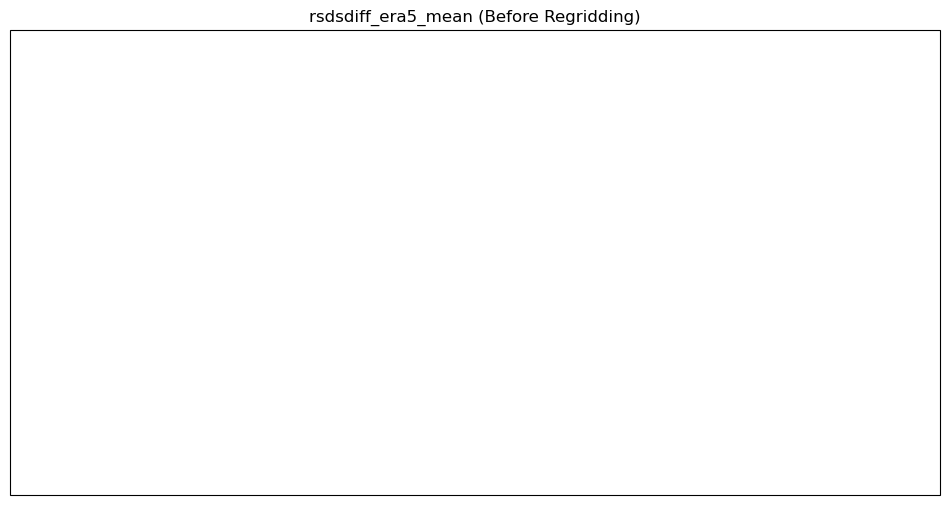

In [59]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract the longitude and latitude from the datasets
lon_era5 = rsdsdiff_era5_mean_cut.lon
lat_era5 = rsdsdiff_era5_mean_cut.lat
lon_era5_interp = rsdsdiff_era5_mean_interp_cut.lon
lat_era5_interp = rsdsdiff_era5_mean_interp_cut.lat

# Calculate the global min and max of solar diffuse irradiance (before and after regridding)
vmin = min(rsdsdiff_era5_mean.min(), rsdsdiff_era5_mean_interp_cut.min())
vmax = max(rsdsdiff_era5_mean.max(), rsdsdiff_era5_mean_interp_cut.max())

# Create the figure for rsds_era5_mean (before regridding)
fig1, ax1 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax1.set_title('rsdsdiff_era5_mean (Before Regridding)')
rsdsdiff_era5_mean_cut.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar diffuse irradiance (W/m^2)'},
    vmin=vmin, vmax=vmax  # Set consistent color scale
)

# Add map features for context
ax1.coastlines(resolution='10m', linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (before regridding)
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5, ylocs=lat_era5, x_inline=False, y_inline=False)

# Set the extent to Europe for the first plot
ax1.set_extent([lon_era5.min(), lon_era5.max(), lat_era5.min(), lat_era5.max()])

# Show the first plot
plt.title(f'Average Solar Diffuse Irradiance over Europe, Era5 before regridding')
plt.tight_layout()
plt.show()

# Create the figure for rsds_era5_mean_interp (after regridding)
fig2, ax2 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax2.set_title('rsdsdiff_era5_mean_interp (After Regridding)')
rsdsdiff_era5_mean_interp_cut.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar diffuse irradiance (W/m^2)'},
    vmin=vmin, vmax=vmax  # Set consistent color scale
)

# Add map features for context
ax2.coastlines(resolution='10m', linewidth=1)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (after regridding)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5_interp, ylocs=lat_era5_interp, x_inline=False, y_inline=False)

# Set the extent to Europe for the second plot
ax2.set_extent([lon_era5_interp.min(), lon_era5_interp.max(), lat_era5_interp.min(), lat_era5_interp.max()])

# Show the second plot
plt.title(f'Average Solar Diffuse Irradiance over Europe, Era5 after regridding')
plt.tight_layout()
plt.show()


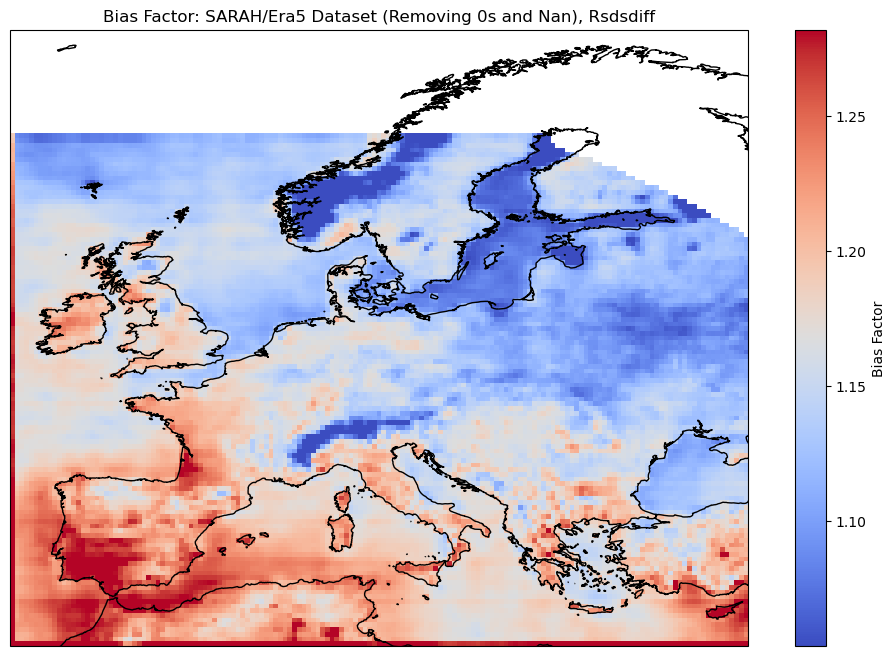

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming these variables exist
denominator_rsdsdiff = rsdsdiff_era5_mean_interp_cut.values  # ERA5 dataset
numerator_rsdsdiff = rsdsdiff_sarah_mean_cut.values  # SARAH dataset

# Ensure valid bias factor calculation
mask_valid_rsdsdiff= (denominator_rsdsdiff != 0) & (numerator_rsdsdiff != 0)  # Avoid division by zero and all values in SARAH that have mean 0
biased_values_rsdsdiff = np.where(mask_valid_rsdsdiff, numerator_rsdsdiff / denominator_rsdsdiff, np.nan)  # Replace invalid cases with NaN

# Ensure correct shape (remove extra dimension if it exists)
biased_values_rsdsdiff = np.squeeze(biased_values_rsdsdiff)  # Remove extra dimensions (e.g., (2, 131, 177) to (131, 177))

# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = rsdsdiff_sarah_mean_cut.lon.values
lat = rsdsdiff_sarah_mean_cut.lat.values

# Ensure lon/lat are 2D using meshgrid
lon2d, lat2d = np.meshgrid(lon, lat)

# Use percentiles to remove outliers
vmin = np.nanpercentile(biased_values_rsdsdiff, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(biased_values_rsdsdiff, 98)  # 98th percentile (upper bound)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, biased_values_rsdsdiff,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=vmin, vmax=vmax  # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.set_title("Bias Factor: SARAH/Era5 Dataset (Removing 0s and Nan), Rsdsdiff")

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show()

In [61]:
# Calculate the 2nd and 98th percentiles to exclude outliers
lower_percentile_rsdsdiff = np.nanpercentile(biased_values_rsdsdiff, 2)  # 2nd percentile
upper_percentile_rsdsdiff = np.nanpercentile(biased_values_rsdsdiff, 98)  # 98th percentile

# Print the percentiles to check their range
print(f"2nd Percentile: {lower_percentile_rsdsdiff}")
print(f"98th Percentile: {upper_percentile_rsdsdiff}")

# Mask the biased_values to keep only those within the 2nd and 98th percentiles
filtered_biased_values_rsdsdiff = biased_values_rsdsdiff[(biased_values_rsdsdiff >= lower_percentile_rsdsdiff) & (biased_values_rsdsdiff <= upper_percentile_rsdsdiff)]

# Calculate the mean of the filtered values
mean_bias_factor_era5_sarah_rsdsdiff = np.nanmean(filtered_biased_values_rsdsdiff)

print(f"Mean Bias Factor for Rsdsdiff(excluding outliers): {mean_bias_factor_era5_sarah_rsdsdiff:.3f}")

2nd Percentile: 1.0539500713348389
98th Percentile: 1.2817888259887695
Mean Bias Factor for Rsdsdiff(excluding outliers): 1.161


In [62]:
corrected_rsdsdiff_era5= rsdsdiff_era5_mean_interp_cut.values * biased_values_rsdsdiff
corrected_rsdsdiff_era5

array([[78.64694 , 78.17123 , 77.60068 , ..., 72.431816, 72.72505 ,
        72.83157 ],
       [78.674736, 78.239586, 77.770164, ..., 72.609924, 72.983086,
        73.09608 ],
       [78.39561 , 77.9245  , 77.49674 , ..., 72.02523 , 72.30162 ,
        72.060165],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

In [63]:

from scipy import interpolate

# Create a mask to identify the NaN values
nan_mask_rsdsdiff = np.isnan(corrected_rsdsdiff_era5)

# Perform interpolation to fill NaN values
# Use the 'nearest' method to fill NaNs with the closest available value

# Interpolation along each column (latitude)
corrected_rsdsdiff_era5_filled = np.copy(corrected_rsdsdiff_era5)

for i in range(corrected_rsdsdiff_era5.shape[1]):  # Iterate over each column (longitude)
    col = corrected_rsdsdiff_era5[:, i]
    # Interpolate the column for NaN values
    col_filled = interpolate.interp1d(
        np.where(~np.isnan(col))[0],  # Indices of non-NaN values
        col[~np.isnan(col)],  # Non-NaN values
        kind='nearest',  # Nearest-neighbor interpolation
        fill_value='extrapolate',  # Extrapolate if needed (you can set to 'NaN' instead)
        bounds_error=False  # Avoid errors if no non-NaN values are found
    )
    corrected_rsdsdiff_era5_filled[:, i] = col_filled(np.arange(corrected_rsdsdiff_era5.shape[0]))

# After filling NaNs, check again for NaNs
nan_count_filled_rsdsdiff = np.sum(np.isnan(corrected_rsdsdiff_era5_filled))

print(f"Number of NaN values after filling: {nan_count_filled_rsdsdiff}")

Number of NaN values after filling: 0


In [64]:
corrected_rsdsdiff_era5_filled

array([[78.64694 , 78.17123 , 77.60068 , ..., 72.431816, 72.72505 ,
        72.83157 ],
       [78.674736, 78.239586, 77.770164, ..., 72.609924, 72.983086,
        73.09608 ],
       [78.39561 , 77.9245  , 77.49674 , ..., 72.02523 , 72.30162 ,
        72.060165],
       ...,
       [49.25717 , 49.50052 , 49.556522, ..., 54.355415, 54.65349 ,
        54.82486 ],
       [49.25717 , 49.50052 , 49.556522, ..., 54.355415, 54.65349 ,
        54.82486 ],
       [49.25717 , 49.50052 , 49.556522, ..., 54.355415, 54.65349 ,
        54.82486 ]], dtype=float32)

In [65]:
#Now we do the same for rsdsdiff
from regridding_functions import read_and_average_era5_marta
from regridding_functions import read_and_average_sarah
tas_era5_mean= read_and_average_era5_marta('temperature')
tas_sarah_mean= read_and_average_sarah('temperature')

['/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-2010-era5.nc', '/groups/EXTREMES/cutouts/europe-2012-era5.nc', '/groups/EXTREMES/cutouts/europe-2013-era5.nc']
['/groups/EXTREMES/SARAH-3/europe-1996-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2010-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2012-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2013-sarah3-era5.nc']


In [66]:
tas_era5_mean_cut=tas_era5_mean.sel(x=slice(-12, 35), y=slice(33, 72))
tas_sarah_mean_cut=tas_sarah_mean.sel(x=slice(-12, 35), y=slice(33, 72))

In [67]:
from regridding_functions import regrid
regridder_tas=regrid(tas_era5_mean_cut, tas_sarah_mean_cut, method='conservative')

tas_era5_mean_interp_cut=regridder_tas(tas_era5_mean_cut)

189 190
157 158
157 158
131 132


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable temperature as the horizontal dimensions for the regridding.
  warnings.warn(


NotImplementedError: 'item' is not yet a valid method on dask arrays

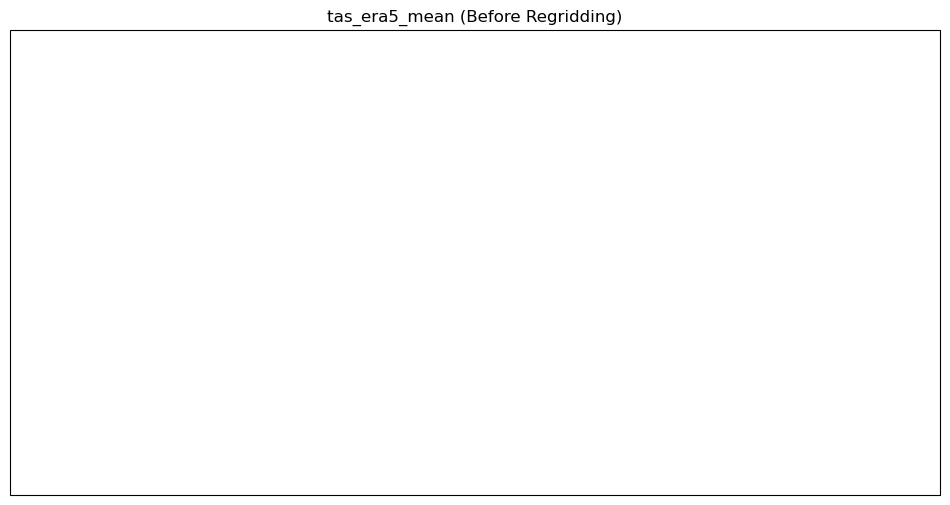

In [72]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import TwoSlopeNorm

# Function to remove outliers using IQR
def remove_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data.where((data >= lower_bound) & (data <= upper_bound))

# Mask zero values and remove outliers in the datasets
tas_era5_mean_cut = remove_outliers(tas_era5_mean_cut.where(tas_era5_mean_cut != 0))
tas_era5_mean_interp_cut = remove_outliers(tas_era5_mean_interp_cut.where(tas_era5_mean_interp_cut != 0))

# Extract the longitude and latitude from the datasets
lon_era5_tas = tas_era5_mean_cut.lon
lat_era5_tas = tas_era5_mean_cut.lat
lon_era5_interp_tas = tas_era5_mean_interp_cut.lon
lat_era5_interp_tas = tas_era5_mean_interp_cut.lat

# Calculate the global min and max of temperature (before and after regridding)
vmin_tas = min(tas_era5_mean_cut.min(), tas_era5_mean_interp_cut.min())
vmax_tas = max(tas_era5_mean_cut.max(), tas_era5_mean_interp_cut.max())
midpoint_tas = 0.5 * (vmin_tas + vmax_tas)

# Create the figure for tas_era5_mean (before regridding)
fig1, ax1 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax1.set_title('tas_era5_mean (Before Regridding)')
tas_era5_mean_cut.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for temperature
    cbar_kwargs={'label': 'Temperature (K)'},
    norm=TwoSlopeNorm(vmin=vmin_tas, vcenter=midpoint_tas, vmax=vmax_tas)  # Set consistent color scale with midpoint
)

# Add map features for context
ax1.coastlines(resolution='10m', linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (before regridding)
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5_tas, ylocs=lat_era5_tas, x_inline=False, y_inline=False)

# Set the extent to Europe for the first plot
ax1.set_extent([lon_era5_tas.min(), lon_era5_tas.max(), lat_era5_tas.min(), lat_era5_tas.max()])

# Show the first plot
plt.title(f'Average Temperature over Europe, Era5 before regridding')
plt.tight_layout()
plt.show()

# Create the figure for tas_era5_mean_interp (after regridding)
fig2, ax2 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax2.set_title('tas_era5_mean_interp (After Regridding)')
tas_era5_mean_interp_cut.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for temperature
    cbar_kwargs={'label': 'Temperature (K)'},
    norm=TwoSlopeNorm(vmin=vmin_tas, vcenter=midpoint_tas, vmax=vmax_tas)  # Set consistent color scale with midpoint
)

# Add map features for context
ax2.coastlines(resolution='10m', linewidth=1)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (after regridding)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5_interp_tas, ylocs=lat_era5_interp_tas, x_inline=False, y_inline=False)

# Set the extent to Europe for the second plot
ax2.set_extent([lon_era5_interp_tas.min(), lon_era5_interp_tas.max(), lat_era5_interp_tas.min(), lat_era5_interp_tas.max()])

# Show the second plot
plt.title(f'Average Temperature over Europe, Era5 after regridding')
plt.tight_layout()
plt.show()

In [75]:
denominator_tas = tas_era5_mean_interp_cut.values  # ERA5 dataset
numerator_tas = tas_sarah_mean_cut.values 


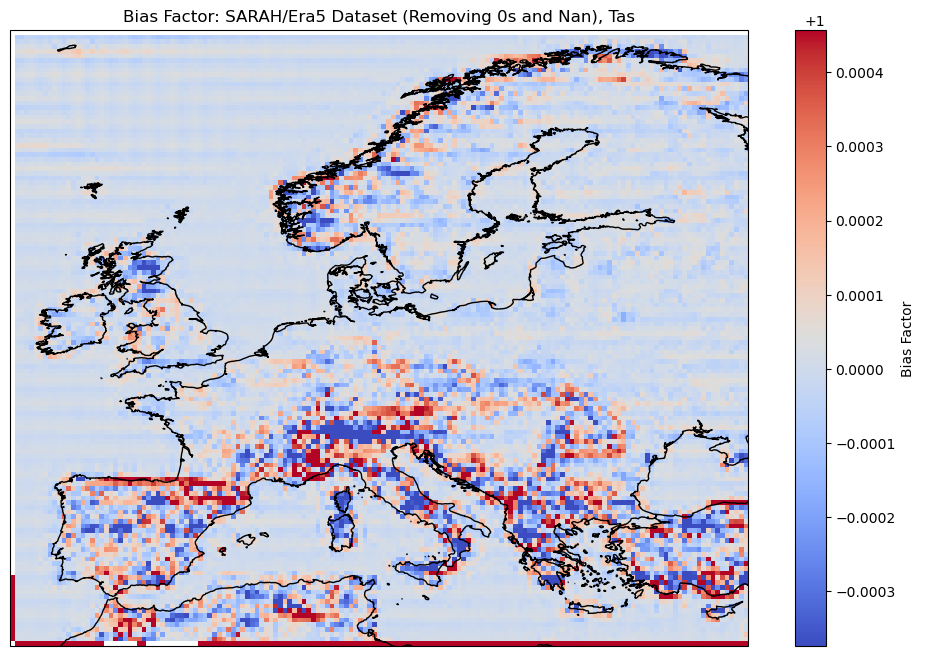

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming these variables exist
denominator_tas = tas_era5_mean_interp_cut.values  # ERA5 dataset
numerator_tas = tas_sarah_mean_cut.values  # SARAH dataset

# Ensure valid bias factor calculation
mask_valid_tas = (denominator_tas != 0) & (numerator_tas != 0)  # Avoid division by zero and all values in SARAH that have mean 0
biased_values_tas = np.where(mask_valid_tas, numerator_tas / denominator_tas, np.nan)  # Replace invalid cases with NaN

# Ensure correct shape (remove extra dimension if it exists)
biased_values_tas = np.squeeze(biased_values_tas)  # Remove extra dimensions (e.g., (2, 131, 177) to (131, 177))

# Check if the biased_values shape matches lon2d_tas, lat2d_tas
# Get lat/lon values
lon_tas = tas_sarah_mean_cut.lon.values
lat_tas = tas_sarah_mean_cut.lat.values

# Ensure lon/lat are 2D using meshgrid
lon2d_tas, lat2d_tas = np.meshgrid(lon_tas, lat_tas)

# Use percentiles to remove outliers
vmin_tas = np.nanpercentile(biased_values_tas, 2)  # 2nd percentile (lower bound)
vmax_tas = np.nanpercentile(biased_values_tas, 98)  # 98th percentile (upper bound)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d_tas, lat2d_tas, biased_values_tas,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=vmin_tas, vmax=vmax_tas  # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.set_title("Bias Factor: SARAH/Era5 Dataset (Removing 0s and Nan), Tas")

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show()

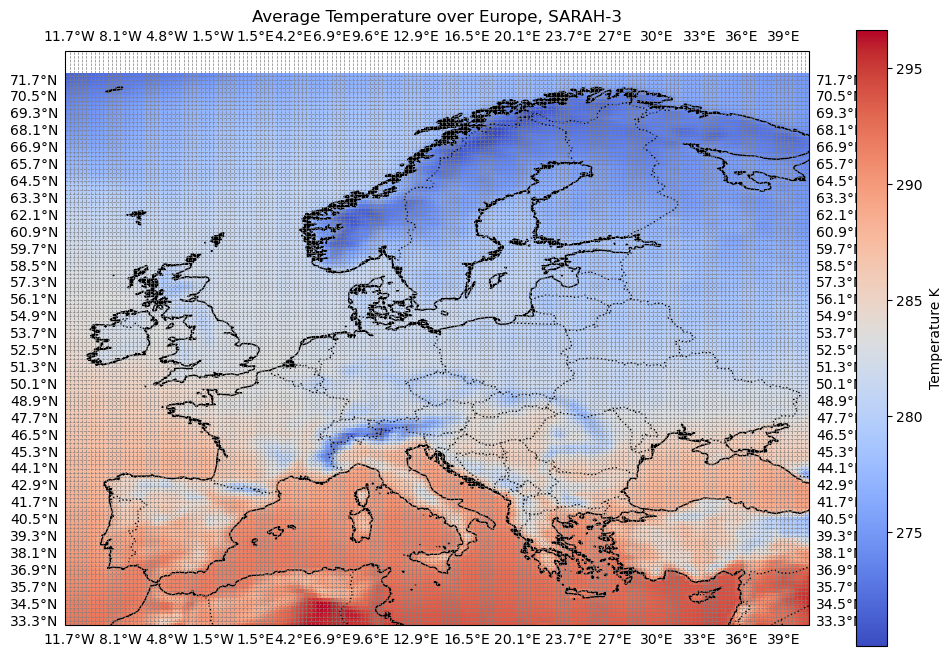

In [96]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract the longitude and latitude from the dataset
lon_tas_sarah = tas_sarah_mean.lon
lat_tas_sarah = tas_sarah_mean.lat

# Create the figure and axes with a PlateCarree projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
tas_sarah_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Temperature K'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe using the min and max of the lon and lat from the data
ax.set_extent([lon_tas_sarah.min(), lon_tas_sarah.max(), lat_tas_sarah.min(), lat_tas_sarah.max()])

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon, ylocs=lat, x_inline=False, y_inline=False)

# Add title and labels
plt.title(f'Average Temperature over Europe, SARAH-3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [74]:
# Calculate the 2nd and 98th percentiles to exclude outliers
lower_percentile_tas = np.nanpercentile(biased_values_tas, 2)  # 2nd percentile
upper_percentile_tas = np.nanpercentile(biased_values_tas, 98)  # 98th percentile

# Print the percentiles to check their range
print(f"2nd Percentile: {lower_percentile_tas}")
print(f"98th Percentile: {upper_percentile_tas}")

# Mask the biased_values_tas to keep only those within the 2nd and 98th percentiles
filtered_biased_values_tas = biased_values_tas[(biased_values_tas >= lower_percentile_tas) & (biased_values_tas <= upper_percentile_tas)]

# Calculate the mean of the filtered values
mean_bias_factor_era5_sarah_tas = np.nanmean(filtered_biased_values_tas)

print(f"Mean Bias Factor (excluding outliers): {mean_bias_factor_era5_sarah_tas:.3f}")

2nd Percentile: 0.9996262417214671
98th Percentile: 1.000456915207001
Mean Bias Factor (excluding outliers): 1.000


In [98]:
corrected_tas_era5= tas_era5_mean_interp.values * biased_values_tas
corrected_tas_era5

array([[         nan, 292.04835544, 292.06729153, ..., 293.53769988,
        293.91362179,          nan],
       [291.95240652, 291.96274544, 291.97191183, ..., 293.5658677 ,
        293.88217767,          nan],
       [291.84642755, 291.86206355, 291.87364713, ..., 293.74132111,
        293.979466  ,          nan],
       ...,
       [         nan, 272.26380489, 272.35078845, ..., 275.22415053,
        275.19056202,          nan],
       [         nan, 271.90116899, 272.00151892, ..., 275.0583535 ,
        275.05978716,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [103]:
from scipy import interpolate
import numpy as np

# Create a mask to identify the NaN values
nan_mask_tas = np.isnan(corrected_tas_era5)

# Perform interpolation to fill NaN values
# Use the 'nearest' method to fill NaNs with the closest available value

# Interpolation along each column (latitude)
corrected_tas_era5_filled = np.copy(corrected_tas_era5)

for i in range(corrected_tas_era5.shape[1]):  # Iterate over each column (longitude)
    col = corrected_tas_era5[:, i]
    # Check if the column contains only NaN values
    if np.all(np.isnan(col)):
        continue  # Skip this column if it contains only NaN values
    # Interpolate the column for NaN values
    col_filled = interpolate.interp1d(
        np.where(~np.isnan(col))[0],  # Indices of non-NaN values
        col[~np.isnan(col)],  # Non-NaN values
        kind='nearest',  # Nearest-neighbor interpolation
        fill_value='extrapolate',  # Extrapolate if needed (you can set to 'NaN' instead)
        bounds_error=False  # Avoid errors if no non-NaN values are found
    )
    corrected_tas_era5_filled[:, i] = col_filled(np.arange(corrected_tas_era5.shape[0]))

# Interpolation along each row (longitude) for remaining NaNs
for i in range(corrected_tas_era5_filled.shape[0]):  # Iterate over each row (latitude)
    row = corrected_tas_era5_filled[i, :]
    # Check if the row contains only NaN values
    if np.all(np.isnan(row)):
        continue  # Skip this row if it contains only NaN values
    # Interpolate the row for NaN values
    row_filled = interpolate.interp1d(
        np.where(~np.isnan(row))[0],  # Indices of non-NaN values
        row[~np.isnan(row)],  # Non-NaN values
        kind='nearest',  # Nearest-neighbor interpolation
        fill_value='extrapolate',  # Extrapolate if needed (you can set to 'NaN' instead)
        bounds_error=False  # Avoid errors if no non-NaN values are found
    )
    corrected_tas_era5_filled[i, :] = row_filled(np.arange(corrected_tas_era5_filled.shape[1]))

# After filling NaNs, check again for NaNs
nan_count_filled = np.sum(np.isnan(corrected_tas_era5_filled))

print(f"Number of NaN values after filling: {nan_count_filled}")



Number of NaN values after filling: 0


In [104]:
corrected_tas_era5_filled

array([[291.95240652, 292.04835544, 292.06729153, ..., 293.53769988,
        293.91362179, 293.91362179],
       [291.95240652, 291.96274544, 291.97191183, ..., 293.5658677 ,
        293.88217767, 293.88217767],
       [291.84642755, 291.86206355, 291.87364713, ..., 293.74132111,
        293.979466  , 293.979466  ],
       ...,
       [291.31033692, 272.26380489, 272.35078845, ..., 275.22415053,
        275.19056202, 275.19056202],
       [291.31033692, 271.90116899, 272.00151892, ..., 275.0583535 ,
        275.05978716, 275.05978716],
       [291.31033692, 271.90116899, 272.00151892, ..., 275.0583535 ,
        275.05978716, 275.05978716]])